# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# read the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)



(23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']
['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


In [4]:
# Print out any information you need to understand your dataframe
# df.dtypes

# df.shape

# df.head
null=df['Title'].isnull().value_counts()
print(null)

False    19676
True      3810
Name: Title, dtype: int64


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

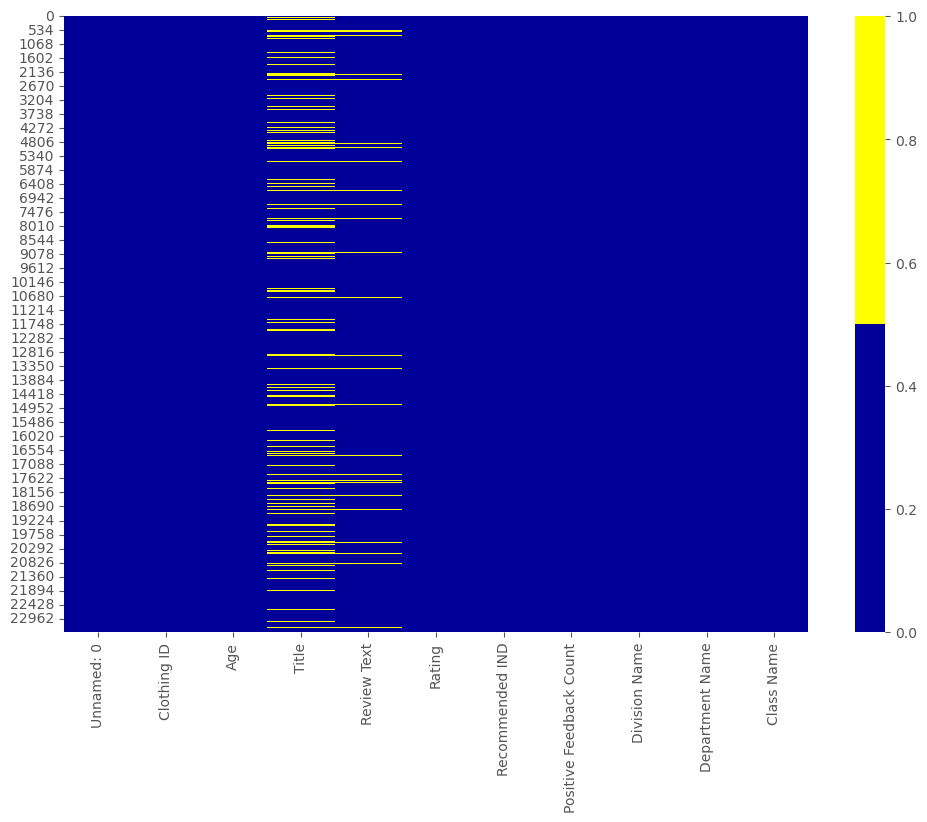

In [5]:
# Plot a heatmap of any missing data
cols= df.columns[:11]
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))


Unnamed: 0-0%
Clothing ID-0%
Age-0%
Title-16%
Review Text-4%
Rating-0%
Recommended IND-0%
Positive Feedback Count-0%
Division Name-0%
Department Name-0%
Class Name-0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<Axes: xlabel='index'>

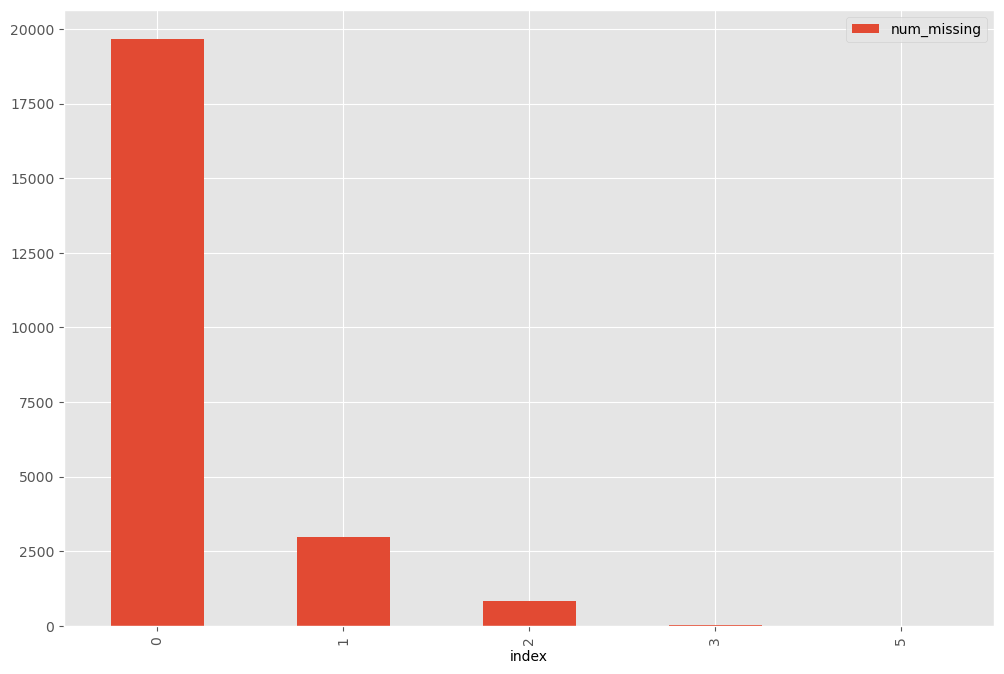

In [7]:
#Missing Data Histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

<!-- Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below! -->



In [13]:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

df.shape

df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title_ismissing',
       'Review Text_ismissing', 'Division Name_ismissing',
       'Department Name_ismissing', 'Class Name_ismissing', 'num_missing'],
      dtype='object')

In [24]:
df['Division Name'] = df['Division Name'].fillna('_MISSING_')

df['Department Name'] = df['Department Name'].fillna('_MISSING_')

df['Class Name'] = df['Class Name'].fillna('_MISSING_')


df['Division Name'].value_counts()['_MISSING_']

df['Department Name'].value_counts()['_MISSING_']

df['Class Name'].value_counts()['_MISSING_']


14

In [25]:
# Handle any missing data in your dataframe.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: Title
imputing missing values for: Review Text


In [26]:
null=df['Title'].isnull().value_counts()
print(null)

False    23486
Name: Title, dtype: int64


In [27]:
df['Title']

0                                                 Love it!
1                                                 Love it!
2                                  Some major design flaws
3                                         My favorite buy!
4                                         Flattering shirt
                               ...                        
23481                       Great dress for many occasions
23482                           Wish it was made of cotton
23483                                Cute, but see through
23484    Very cute dress, perfect for summer parties an...
23485                      Please make more like this one!
Name: Title, Length: 23486, dtype: object

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<Axes: >

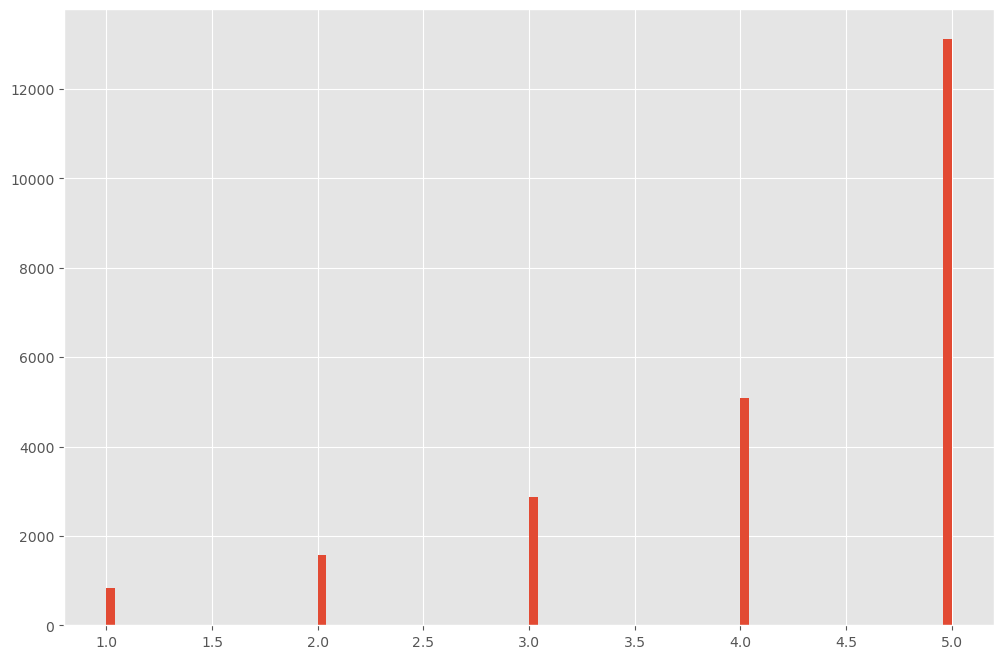

In [34]:
# Plot a histogram to see if there are any outliers.
# med=df['Clothing ID'].median()
# print(med)

df['Rating'].hist(bins=100)


# df.boxplot(column=['Rating'])


<Axes: >

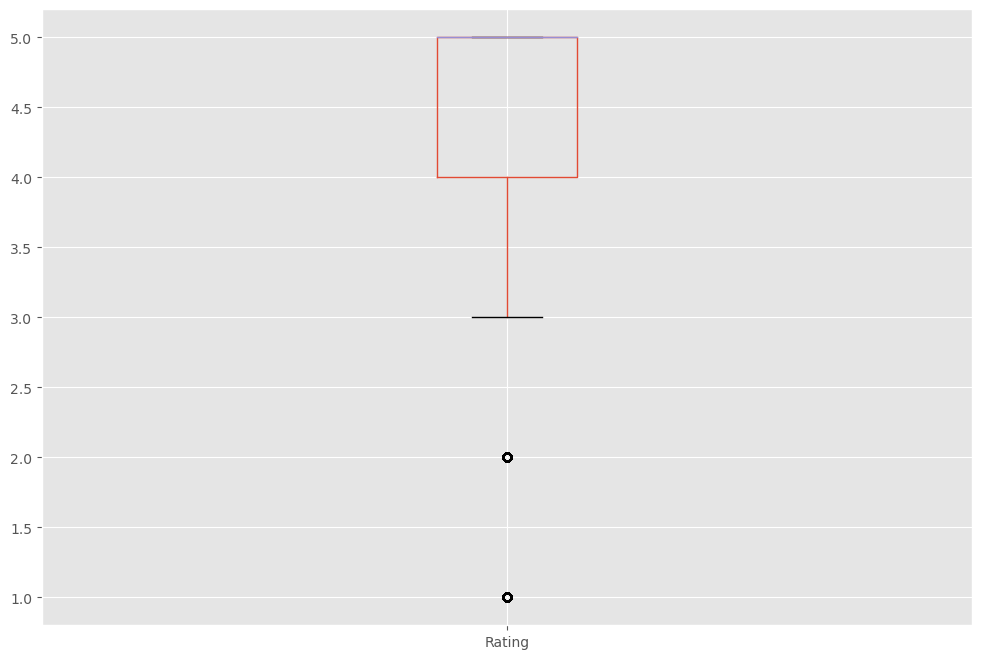

In [35]:
 df.boxplot(column=['Rating'])

In [41]:
# Use the describe() method
df['Rating'].describe()






count    23486.000000
mean         4.196032
std          1.110031
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

<Axes: >

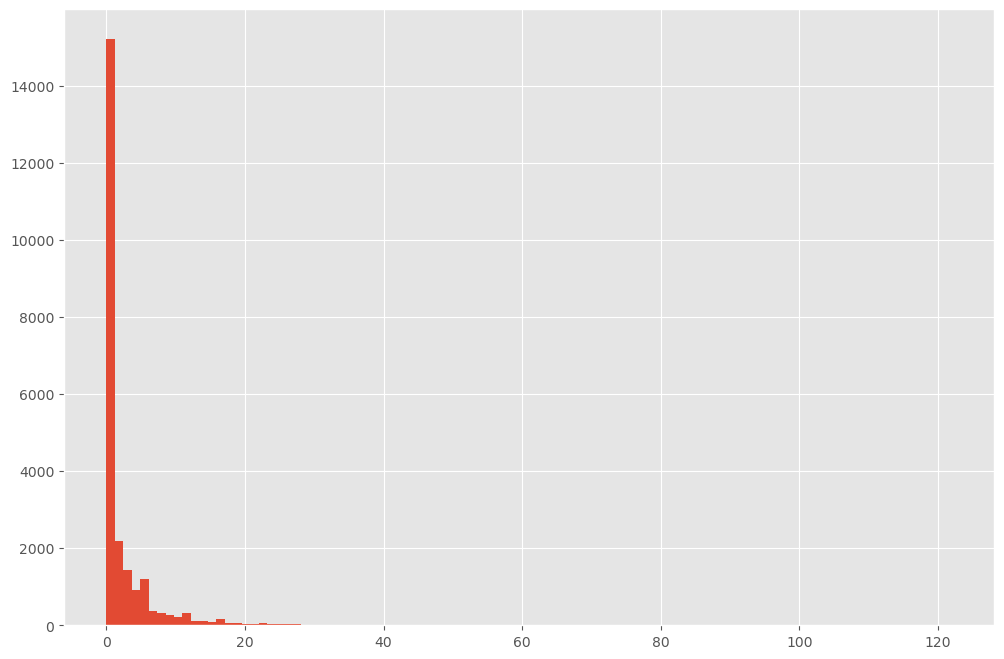

In [42]:
df['Positive Feedback Count'].hist(bins=100)

<Axes: >

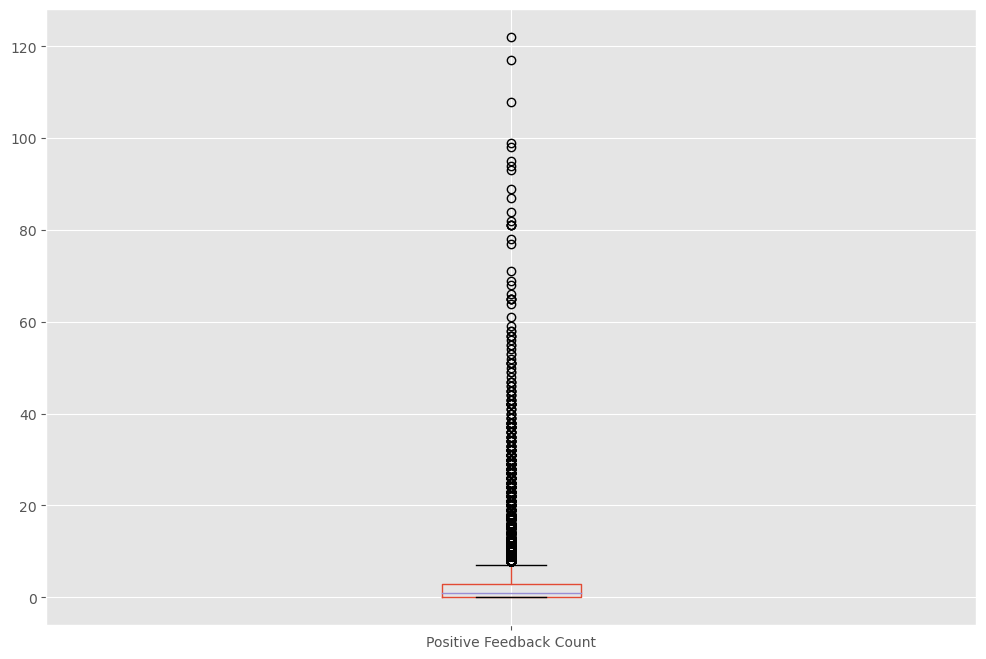

In [36]:
df.boxplot(column=['Positive Feedback Count'])

In [43]:
df['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<Axes: >

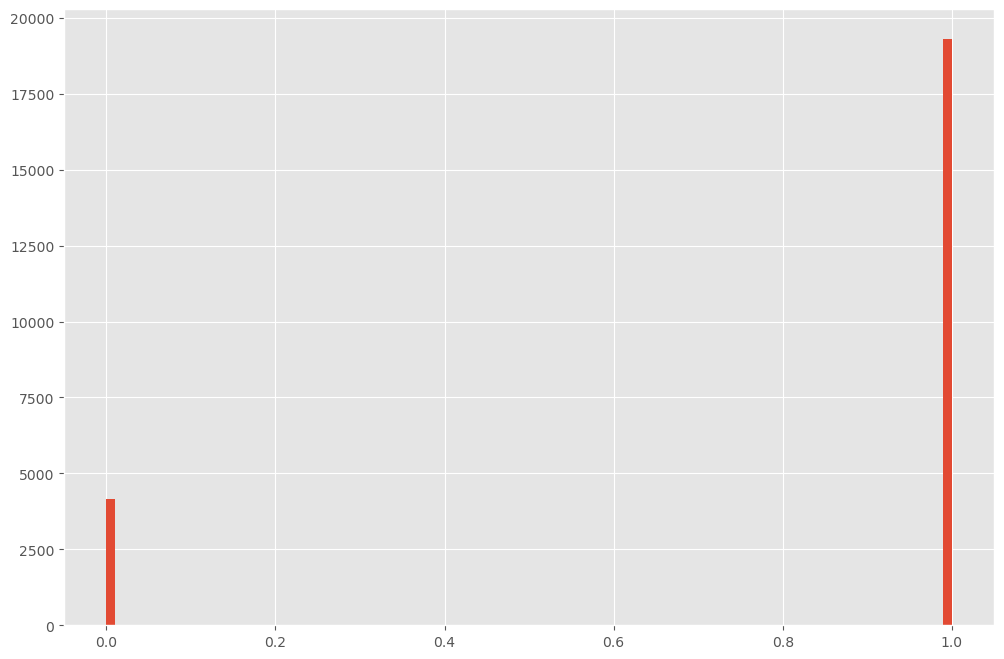

In [30]:
df['Recommended IND'].hist(bins=100)

<Axes: >

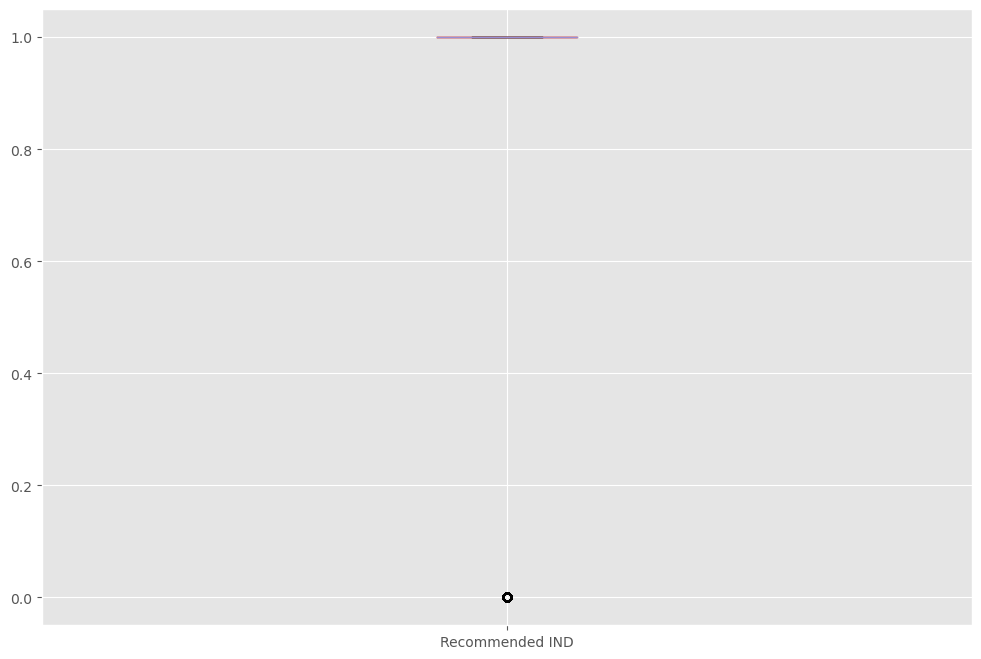

In [46]:
df.boxplot(column=['Recommended IND'])

<Axes: >

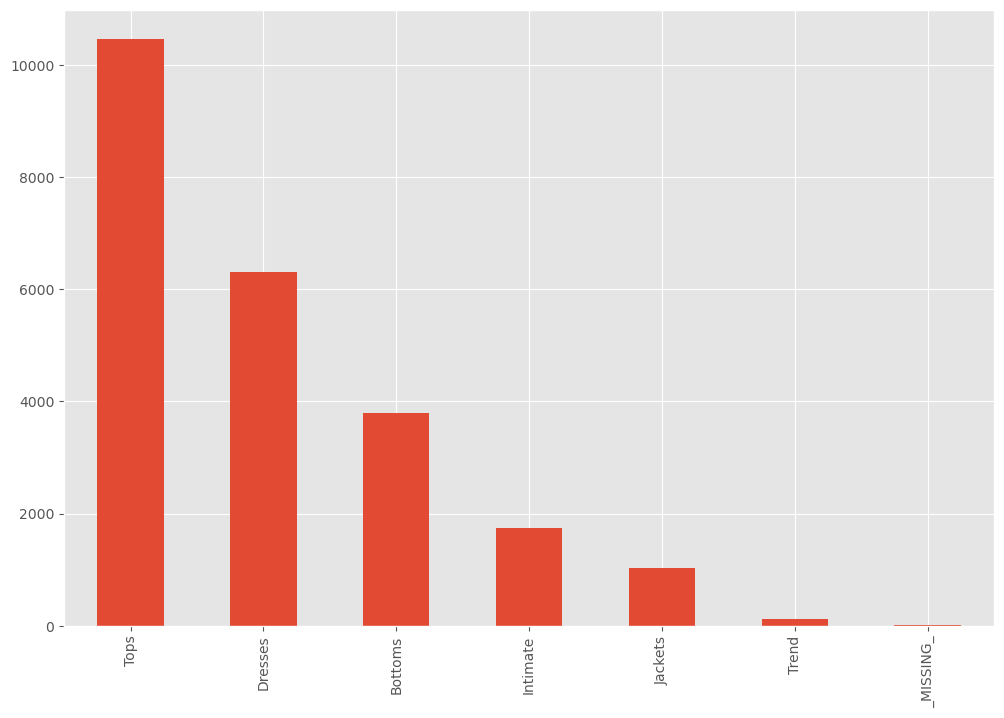

In [45]:
# Plot a bar chart
df['Department Name'].value_counts().plot.bar()

<Axes: >

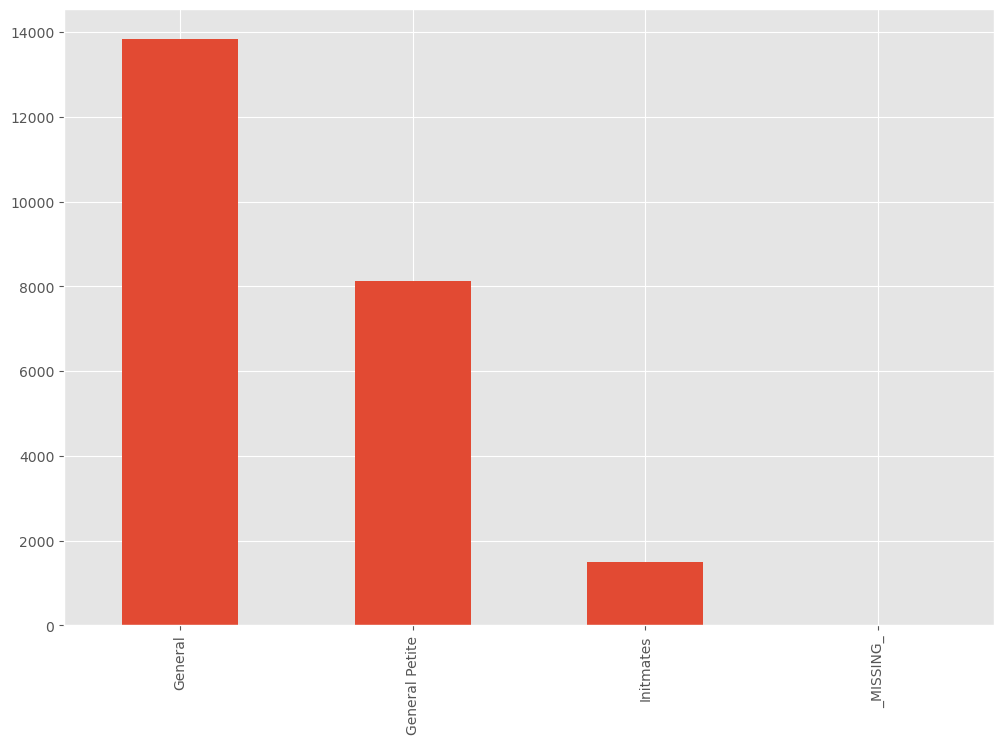

In [47]:
df['Division Name'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

<Axes: >

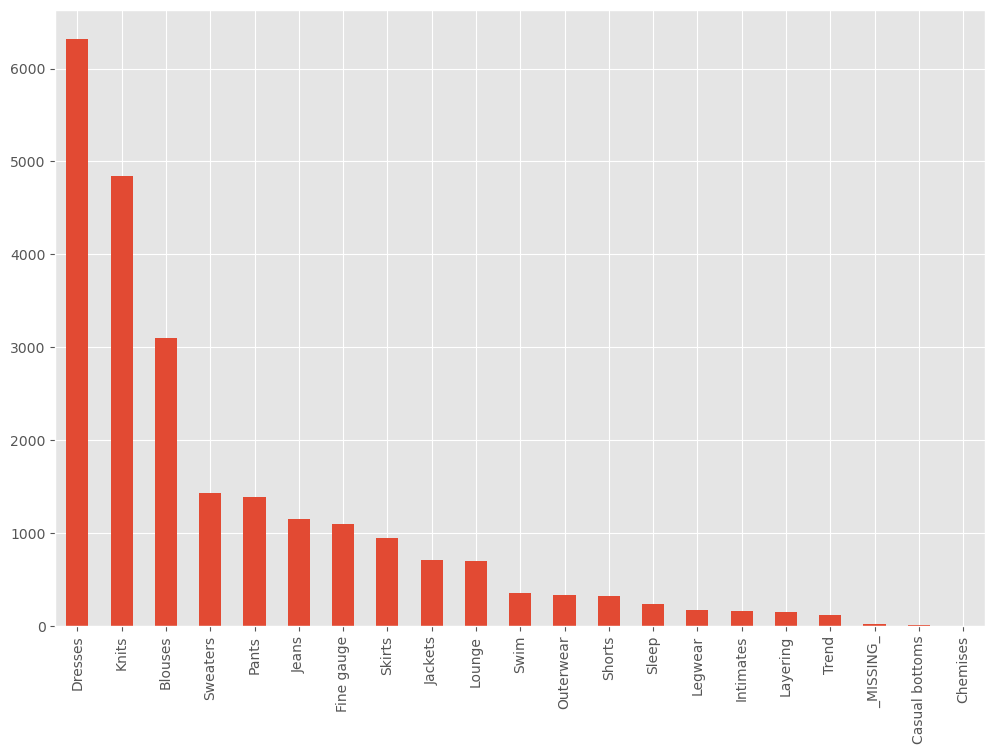

In [44]:
# Handle any outliers in your dataframe
df['Class Name'].value_counts().plot.bar()

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [48]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_ismissing: 96.40211%
False    22641
True       845
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94039%
False    23472
True        14
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94039%
False    23472
True        14
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94039%
False    23472
True        14
Name: Class Name_ismissing, dtype: int64



In [49]:
df['Division Name'].value_counts()['_MISSING_']

14

In [52]:
# Look for duplicates. How will you handle any duplicates?

df_dedupped = df.drop('Clothing ID', axis=1).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)


(23486, 17)
(23486, 16)


In [54]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

key = ['Clothing ID', 'Age', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'Rating','Title']

df.fillna(-999).groupby(key)['Clothing ID'].count().sort_values(ascending=False).head(20)

Clothing ID  Age  Positive Feedback Count  Division Name   Department Name  Class Name  Rating  Title   
1078         35   0                        General Petite  Dresses          Dresses     5       Love it!    5
862          38   0                        General Petite  Tops             Knits       5       Love it!    4
872          36   0                        General         Tops             Knits       5       Love it!    4
895          36   0                        General         Tops             Fine gauge  5       Love it!    4
850          39   0                        General Petite  Tops             Blouses     5       Love it!    3
1081         39   0                        General Petite  Dresses          Dresses     5       Love it!    3
1094         33   0                        General Petite  Dresses          Dresses     5       Love it!    3
862          40   0                        General         Tops             Knits       5       Love it!    3
1081         42

In [55]:
key = ['Clothing ID', 'Age', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name', 'Rating','Title']
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(23486, 17)
(23312, 17)


## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [53]:
# Try to convert all the strings in a column to lower or upper case. 
df['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
_MISSING_            14
Name: Division Name, dtype: int64

In [58]:
df['Division Name upper'] = df['Division Name'].str.upper()
df['Division Name upper'].value_counts(dropna=False)

GENERAL           13850
GENERAL PETITE     8120
INITMATES          1502
_MISSING_            14
Name: Division Name upper, dtype: int64

In [63]:
df['Class Name upper'] = df['Class Name'].str.upper()
df['Class Name upper'].value_counts(dropna=False)

DRESSES           6319
KNITS             4843
BLOUSES           3097
SWEATERS          1428
PANTS             1388
JEANS             1147
FINE GAUGE        1100
SKIRTS             945
JACKETS            704
LOUNGE             691
SWIM               350
OUTERWEAR          328
SHORTS             317
SLEEP              228
LEGWEAR            165
INTIMATES          154
LAYERING           146
TREND              119
_MISSING_           14
CASUAL BOTTOMS       2
CHEMISES             1
Name: Class Name upper, dtype: int64

In [64]:
df['Department Name upper'] = df['Department Name'].str.upper()
df['Department Name upper'].value_counts(dropna=False)

TOPS         10468
DRESSES       6319
BOTTOMS       3799
INTIMATE      1735
JACKETS       1032
TREND          119
_MISSING_       14
Name: Department Name upper, dtype: int64